# Statistics, Modelling & DA Project : Model to predict property prices based on features such as location, size and amenities

### Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

## Loading Data

In [5]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [6]:
df1.shape

(13320, 9)

In [7]:
df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [8]:
df1['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [9]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [10]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [11]:
# Dropping features that are not required to build our model
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

## Data Cleaning

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
# Dropping rows with missing values
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3.shape

(13246, 5)

In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
# Find rows where total_sqft is not a float value
# This helps identify potential data quality issues in the total_sqft column
df3[~df3['total_sqft'].apply(isFloat)].head(10)

location       size      total_sqft  bath    price
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770
648             Arekere  9 Bedroom       4125Perch   9.0  265.000
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000

#### We can see in above data that total_sqft can be a range(e.g. 2100-2850). For such case we can just take average of min and max value in the range.
#### Also there are other case like 34.46Sq. Meter and 4125Perch . We can drop such cases.

In [20]:
def convertSqftToFloat(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        # Handles ranges (e.g., '1000-1200') by taking the average.
        return ((float(tokens[0])+float(tokens[1]))/2)
    else:
        try:   
            return float(x)
        except:
            # Converting other type of entries to None
            return None

In [21]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convertSqftToFloat)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

location       size  total_sqft  bath   price
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00
2               Uttarahalli      3 BHK      1440.0   2.0   62.00
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00
4                  Kothanur      2 BHK      1200.0   2.0   51.00

In [22]:
df4.shape

(13200, 5)

## Feature Engineering 
### Adding new feature called bhk to track bhk number

In [24]:
df5 = df4.copy()
df5['bhk'] = df5['size'].apply(lambda x: int(x.split(' ')[0]))
df5.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [25]:
df5['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Adding new feature called price per square feet

In [27]:
df6 = df5.copy()
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

### Examining categorical variable 'location'

In [29]:
df6['location'] = df6['location'].apply(lambda x: x.strip())
location_stats = df6['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [30]:
# number of unique locations
len(location_stats)

1287

In [31]:
# number of locations with frequency > 15
len(location_stats[location_stats>15])

180

In [32]:
# number of locations with frequency <= 15
len(location_stats[location_stats<=15])

1107

### Dimensionality Reduction : Any location having less than 15 data points should be tagged as "other" location. This way number of location categories can be reduced by huge amount

In [34]:
location_stats_less_than_15 = location_stats[location_stats<=15]
location_stats_less_than_15

location
Nagavarapalya                15
Kodihalli                    15
Judicial Layout              15
Varthur Road                 15
Benson Town                  15
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1107, dtype: int64

In [35]:
df6['location'] = df6['location'].apply(lambda x: 'other' if x in location_stats_less_than_15 else x)
len(df6['location'].unique())

181

In [36]:
df6.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

## Removing Outliers

### Minimum area for 1 bhk property is 300sqft (according to business logic). We can now remove any outliers by keeping our minimum thresold per bhk to be 300 sqft

In [39]:
df6[(df6.total_sqft/df6.bhk)<300]

location       size  total_sqft  bath  price  bhk  \
9                    other  6 Bedroom      1020.0   6.0  370.0    6   
45              HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58                   other  6 Bedroom      1407.0   4.0  150.0    6   
68     Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                   other  3 Bedroom       500.0   3.0  100.0    3   
...                    ...        ...         ...   ...    ...  ...   
13277                other  7 Bedroom      1400.0   7.0  218.0    7   
13279                other  6 Bedroom      1200.0   5.0  130.0    6   
13281      Margondanahalli  5 Bedroom      1375.0   5.0  125.0    5   
13303       Vidyaranyapura  5 Bedroom       774.0   5.0   70.0    5   
13311     Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft  
9        36274.509804  
45       33333.333333  
58       10660.980810  
68        6296.296296  
70       20000.000000  
...               ...  
13277    15571.428571  
13279    10833.333333  
13281     9090.909091  
13303     9043.927649  
13311    16666.666667  

[744 rows x 7 columns]

#### Above data represents outliers and can be removed

In [41]:
df6.shape

(13200, 7)

In [42]:
# Removing outliers having less than 300 sqft area per bhk
df7 = df6[~((df6.total_sqft/df6.bhk)<300)]
df7.shape

(12456, 7)

### Checking for outliers in price_per_sqft

In [44]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation


In [46]:
def remove_pps_outliers(df):
    filtered_data = [] 
    for key, subdf in df.groupby('location'):
        m = subdf['price_per_sqft'].mean()
        st = subdf['price_per_sqft'].std()
        
        # Keep only values within one standard deviation from the mean
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & 
                           (subdf['price_per_sqft'] <= (m + st))]
        
        filtered_data.append(reduced_df)  
        
    return pd.concat(filtered_data, ignore_index=True)
df8 = remove_pps_outliers(df7)
df8.shape

(10396, 7)

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

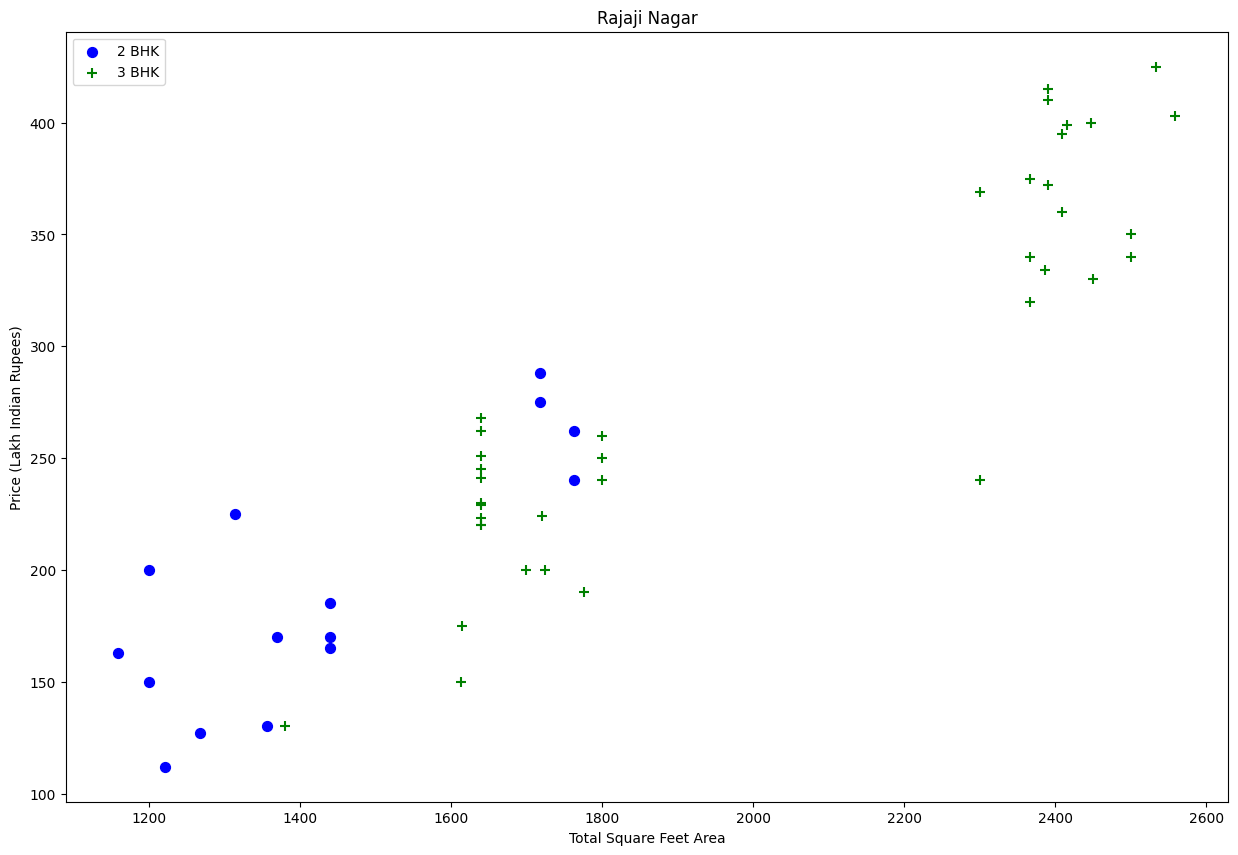

In [48]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df8,"Rajaji Nagar")

#### We should remove properties where for same location, the price of (for example) 2 bedroom apartment is less than 1 bedroom apartment (with same square ft area).

####  What we will do is for a given location, we will build a dictionary of stats per bhk i.e

##### {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [53]:
def remove_bhk_outliers(df):
    exclude_indices = []  # Use a list instead of numpy array for better performance

    for location, location_df in df.groupby('location'):
        bhk_stats = {}  # Dictionary to store mean, std, and count of each BHK
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': bhk_df.price_per_sqft.mean(),
                'std': bhk_df.price_per_sqft.std(),
                'count': bhk_df.shape[0]
            }
        
        # Identify and exclude outliers
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)  # Get stats of (bhk-1)
            
            if stats and stats['count'] > 5:
                # Exclude properties where higher BHK is cheaper per sqft than mean of lower BHK
                outliers = bhk_df[bhk_df.price_per_sqft < stats['mean']].index
                exclude_indices.extend(outliers)  # Append indices to list
    
    return df.drop(index=exclude_indices)
df9 = remove_bhk_outliers(df8)
df9.shape

(7163, 7)

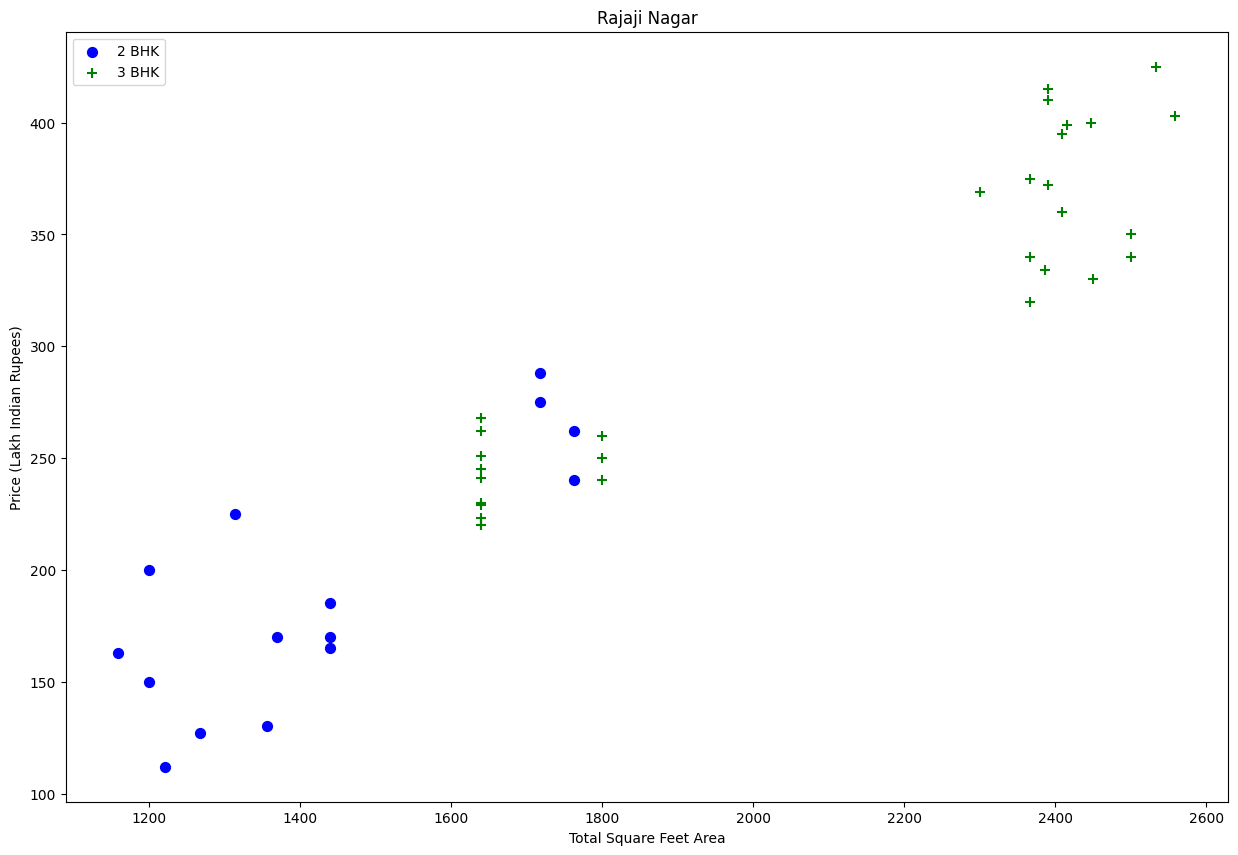

In [54]:
plot_scatter_chart(df9,"Rajaji Nagar")

##### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

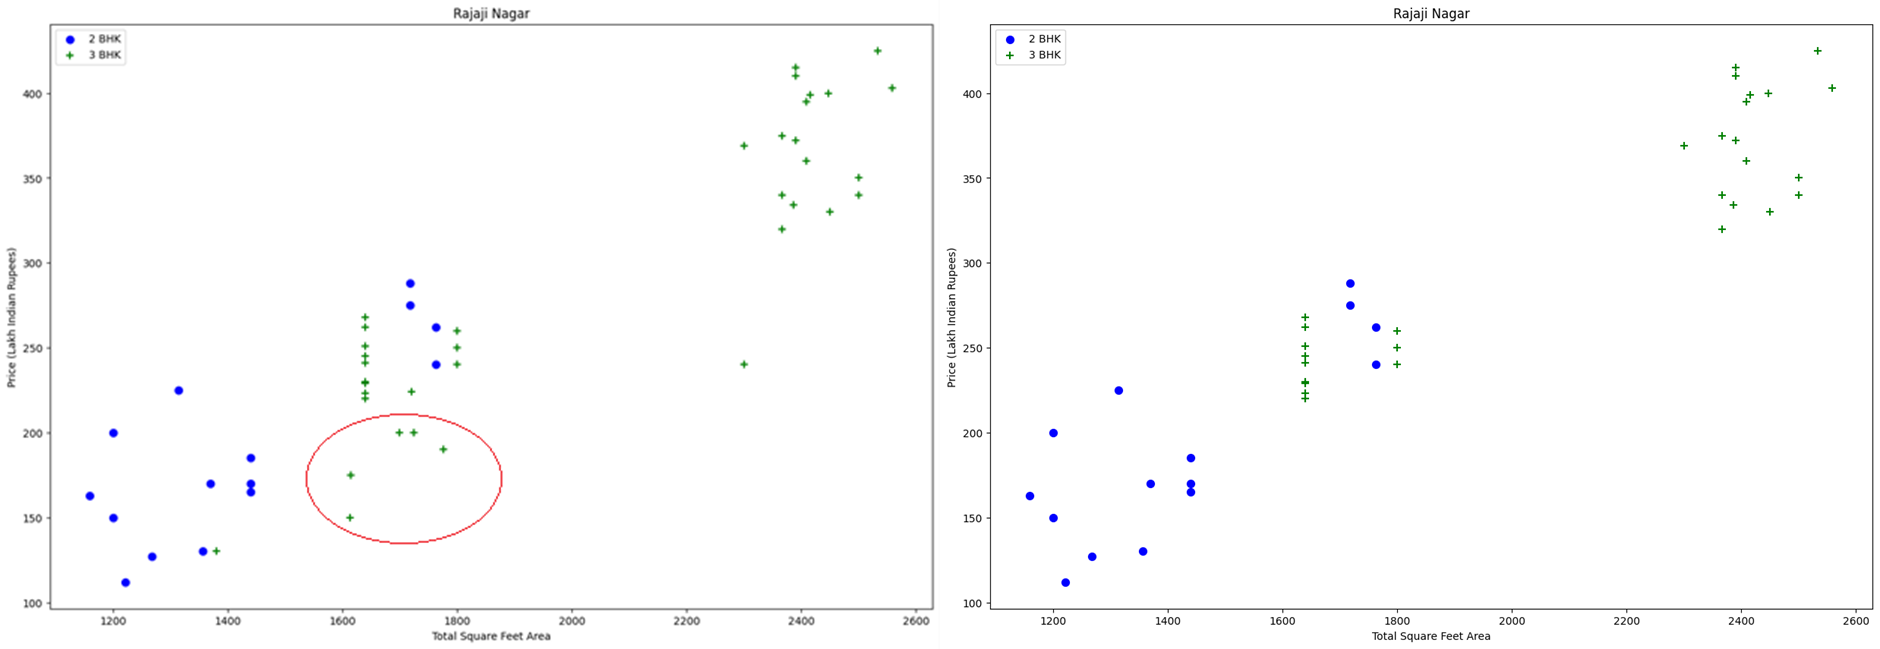

In [56]:
from IPython.display import Image

Image("rajaji_nagar_outliers.png")

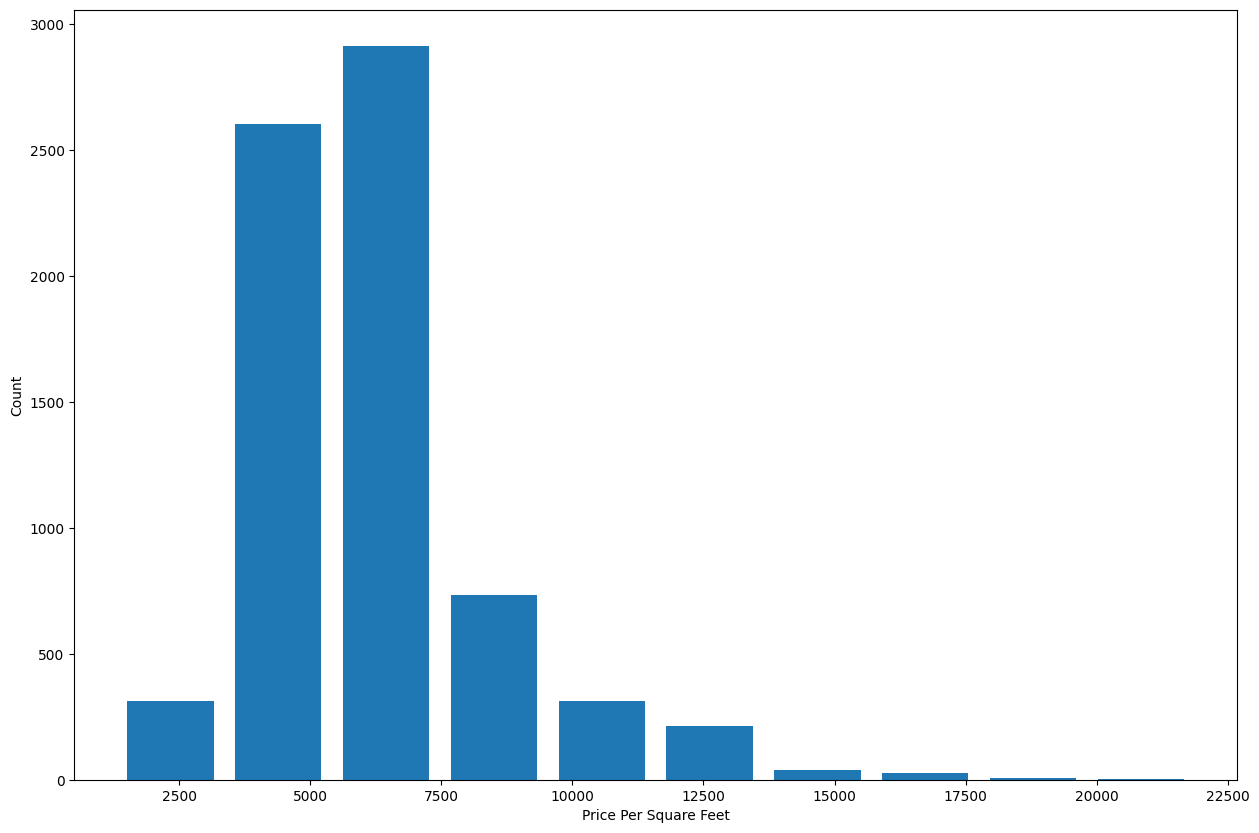

In [57]:
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

### Outlier removal based on bathroom feature

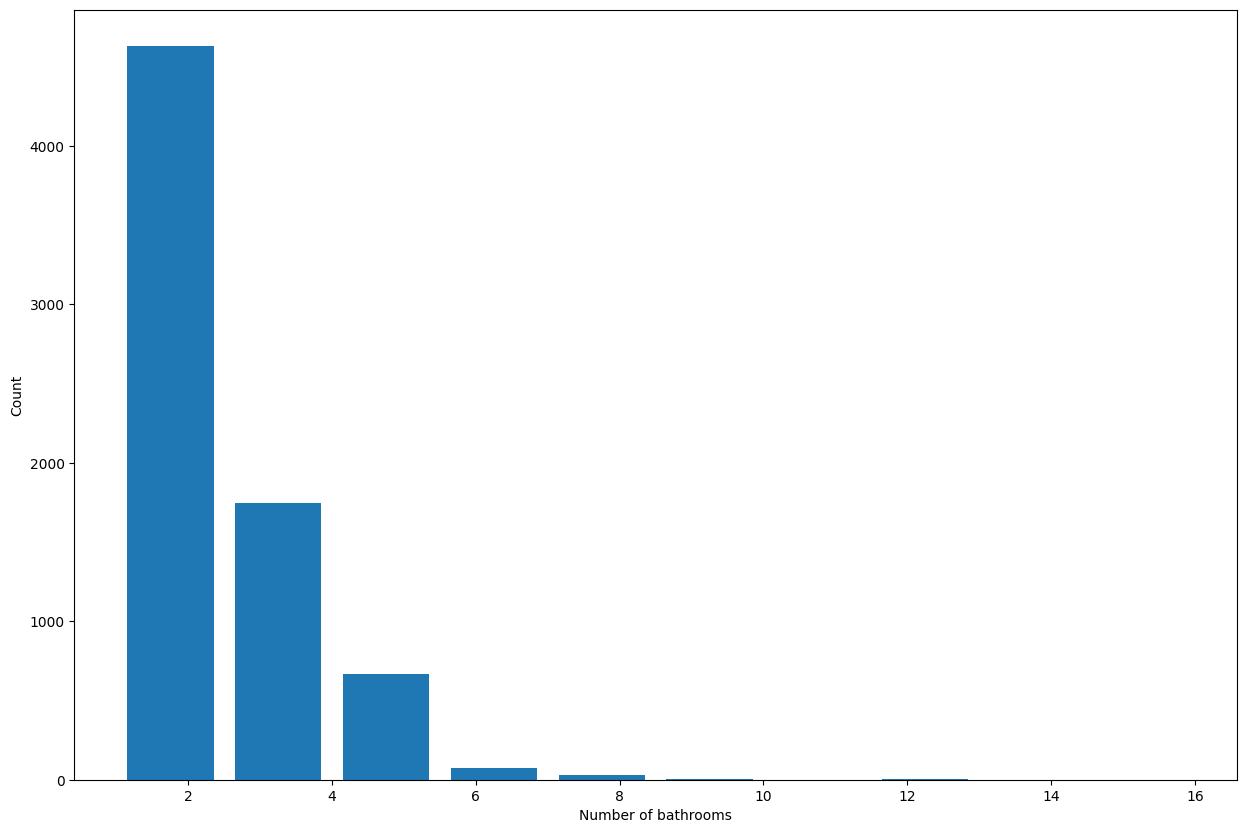

In [59]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [60]:
df9[df9.bath>df9.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
6294  Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8069        other      6 BHK     11338.0   9.0  1000.0    6     8819.897689
9961        other  4 Bedroom      7000.0   8.0   450.0    4     6428.571429

##### It is unusual to have 2 more bathrooms than number of bedrooms in a home. So any home with total bath > 1 + bhk number is an outlier and should be removed

In [62]:
# Removing outliers based on bath
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7085, 7)

##### Since data has been cleaned and outliers have been removed, now we can drop features that are not required for training the model (i.e size and price_per_sqft)

In [64]:
df11 = df10.drop(['size','price_per_sqft'],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk
1  1st Phase JP Nagar      1875.0   3.0  167.0    3
2  1st Phase JP Nagar      1500.0   5.0   85.0    5
3  1st Phase JP Nagar      2065.0   4.0  210.0    3
5  1st Phase JP Nagar      2059.0   3.0  225.0    3
6  1st Phase JP Nagar      1394.0   2.0  100.0    2

## Using One Hot Encoding on location

In [66]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

1st Phase JP Nagar  2nd Stage Nagarbhavi  5th Phase JP Nagar  \
1                True                 False               False   
2                True                 False               False   
3                True                 False               False   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
1               False               False               False   
2               False               False               False   
3               False               False               False   

   9th Phase JP Nagar  Abbigere  Akshaya Nagar  Ambalipura  ...  Varthur  \
1               False     False          False       False  ...    False   
2               False     False          False       False  ...    False   
3               False     False          False       False  ...    False   

   Vidyaranyapura  Vijayanagar  Vittasandra  Whitefield  Yelachenahalli  \
1           False        False        False       False           False   
2           False        False        False       False           False   
3           False        False        False       False           False   

   Yelahanka  Yelahanka New Town  Yeshwanthpur  other  
1      False               False         False  False  
2      False               False         False  False  
3      False               False         False  False  

[3 rows x 181 columns]

In [67]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head(3)

location  total_sqft  bath  price  bhk  1st Phase JP Nagar  \
1  1st Phase JP Nagar      1875.0   3.0  167.0    3                True   
2  1st Phase JP Nagar      1500.0   5.0   85.0    5                True   
3  1st Phase JP Nagar      2065.0   4.0  210.0    3                True   

   2nd Stage Nagarbhavi  5th Phase JP Nagar  6th Phase JP Nagar  \
1                 False               False               False   
2                 False               False               False   
3                 False               False               False   

   7th Phase JP Nagar  ...  Uttarahalli  Varthur  Vidyaranyapura  Vijayanagar  \
1               False  ...        False    False           False        False   
2               False  ...        False    False           False        False   
3               False  ...        False    False           False        False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
1        False       False           False      False               False   
2        False       False           False      False               False   
3        False       False           False      False               False   

   Yeshwanthpur  
1         False  
2         False  
3         False  

[3 rows x 185 columns]

In [68]:
df13 = df12.drop('location',axis='columns')
df13.head(2)

total_sqft  bath  price  bhk  1st Phase JP Nagar  2nd Stage Nagarbhavi  \
1      1875.0   3.0  167.0    3                True                 False   
2      1500.0   5.0   85.0    5                True                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  7th Phase JP Nagar  \
1               False               False               False   
2               False               False               False   

   8th Phase JP Nagar  ...  Uttarahalli  Varthur  Vidyaranyapura  Vijayanagar  \
1               False  ...        False    False           False        False   
2               False  ...        False    False           False        False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
1        False       False           False      False               False   
2        False       False           False      False               False   

   Yeshwanthpur  
1         False  
2         False  

[2 rows x 184 columns]

## Building The Model

In [70]:
df13.shape

(7085, 184)

In [71]:
X = df13.drop(['price'],axis='columns')
X.head(3)

total_sqft  bath  bhk  1st Phase JP Nagar  2nd Stage Nagarbhavi  \
1      1875.0   3.0    3                True                 False   
2      1500.0   5.0    5                True                 False   
3      2065.0   4.0    3                True                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  7th Phase JP Nagar  \
1               False               False               False   
2               False               False               False   
3               False               False               False   

   8th Phase JP Nagar  9th Phase JP Nagar  ...  Uttarahalli  Varthur  \
1               False               False  ...        False    False   
2               False               False  ...        False    False   
3               False               False  ...        False    False   

   Vidyaranyapura  Vijayanagar  Vittasandra  Whitefield  Yelachenahalli  \
1           False        False        False       False           False   
2           False        False        False       False           False   
3           False        False        False       False           False   

   Yelahanka  Yelahanka New Town  Yeshwanthpur  
1      False               False         False  
2      False               False         False  
3      False               False         False  

[3 rows x 183 columns]

In [72]:
X.shape

(7085, 183)

In [73]:
Y = df13.price
Y.head(3)

1    167.0
2     85.0
3    210.0
Name: price, dtype: float64

In [74]:
Y.shape

(7085,)

## Model Selection

- Linear Regression
- Lasso
- Decision Tree
- Random Forest
- Gradient Boosting  

In [77]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]  # FIXED: Removed 'normalize'
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # FIXED: 'mse' -> 'squared_error'
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 10]
            }
        },
        
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function with your dataset
find_best_model_using_gridsearchcv(X, Y)


model  best_score  \
0  linear_regression    0.809932   
1              lasso    0.768903   
2      decision_tree    0.700785   
3      random_forest    0.763529   
4  gradient_boosting    0.806558   

                                         best_params  
0                           {'fit_intercept': False}  
1              {'alpha': 0.1, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  
3             {'max_depth': 20, 'n_estimators': 200}  
4  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...

#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Building the linear regression model

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [81]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8509157599898087

In [82]:
# function to predict property price using inputs locations,sqft,bath and bhk
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0] if location in X.columns else -1

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert to DataFrame with correct column names
    x_df = pd.DataFrame([x], columns=X.columns)

    return lr_clf.predict(x_df)[0] 

##### Testing the model

In [84]:
predict_price('Electronic City Phase II',1056, 2, 2)

38.1069090350303

In [85]:
predict_price('Chikka Tirupathi',2600, 5, 4)

116.30343146624985

In [86]:
predict_price('Ganga Nagar',2600, 3, 3) 

210.86491248656694

## Exporting the tested model to a pickle file

In [88]:
import pickle
with open('property_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Exporting location and column information to a json file that will be useful later on in our prediction application

In [90]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))